# Naïve Bayes Classifier

## Part A: Model Code

Design a Multinomial Naïve Bayes classifier for performing binary classification on the SMS Spam collection dataset. Implement the following methods for the Multinomial_NB model class. The model uses one hyperparameter “alpha” which represents the Additive or Laplace smoothing parameter (0 for no smoothing).



1 . ImplementaMultinomial_NB model class. It should have the following methods.

    a. __init__(self, alpha=1.0)
    Initialization function to instantiate the class.
    
    b. fit(self, X, Y)
    Arguments:
    X : ndarray
    A numpy array with rows representing data samples and columns representing numerical features.
    Y : ndarray
    A 1D numpy array with labels corresponding to each row of the feature matrix X.
    Returns:
    No return value necessary.
    
    c.
    predict(self, X)
    This method performs classification on an array of test vectors X. Use log probabilities to avoid overflow.
    Arguments:
    X : ndarray
    A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent numerical features. 
    Returns:
    1D array of predictions for each row in X.
    The 1D array should be designed as a column vector.
    
    d. [Extra Credit for 478 and Mandatory for 878] [5 pts]
    predict_proba(self, X)
    This method returns probability estimates for the test matrix X.
    Arguments:
    X : ndarray
    A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent numerical features.
    
    Returns:
    A numpy array that contains probability of the samples (unnormalized posterior) for each class in the model. The number rows is equal to the rows in X and number of columns is equal to the number of classes.
    
    e. [Extra Credit for 478 and Mandatory for 878] [5 pts]
    predict_log_proba(self, X)
    This method returns log-probability estimates for the test matrix X.
    Arguments:
    X : ndarray
    A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent numerical features.
    Returns:
    A numpy array that contains log-probability of the samples (unnormalized log posteriors) for each class in the model. The number rows is equal to the rows in X and number of columns is equal to the number of classes.

In [ ]:
class Multinomial_NB:
    
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        return 
    
    def fit(self, X, Y):
        #Counting all occurence of class c in sample 
        all_class = np.unique(Y)
        self.class_prior = [0 for i in all_class]
        for i in Y:
            for j in range(len(all_class)):
                if (i == all_class[j]):
                    self.class_prior[j] = self.class_prior[j] + 1
        #compute class prior            
        for i in range(len(self.class_prior)):
            self.class_prior[i] = (self.class_prior[i] + self.alpha) / len(Y)
        
        
        #self.class_probability = [[0 for j in X[0]] for i in all_class]
        
        self.class_probability = []
        for i in range(len(all_class)):
            class_feature = []
            #print(X_train[0].shape[1])
            for j in range(X_train[0].shape[1]):
                class_feature.append(0)
            self.class_probability.append(class_feature)

        
        #counting words in each class 
        for i in range(len(Y)):
            #print(all_class[0])
            #print(Y[i])
            if Y[i] == all_class[0]:
                for j in range(X_train[0].shape[1]):
                    if (X[i][j]-1) < 0.001:
                        self.class_probability[0][j] = self.class_probability[0][j] + 1
            elif Y[i] == all_class[1]:
                    for j in range(X_train[0].shape[1]):

                        if (X[i][j]-1) < 0.001:
                            self.class_probability[1][j] = self.class_probability[1][j] + 1

        sum_all_probability = [self.class_probability[0][j] + self.class_probability[1][j] for j in range(len(self.class_probability[1]))]
        print(sum_all_probability)
        for i in range(len(self.class_probability)):
            for j in range(len(self.class_probability[0])):
                self.class_probability[i][j] = self.class_probability[i][j]/sum_all_probability[j]
        
        return 
    
    def predict(self, X):
        label_predict = []
        for i in range(len(X)):
            prediction_0 = self.class_prior[0]
            prediction_1 = self.class_prior[1]
            prediction = 0
            for j in range(len(X[i])):
                prediction_0 = prediction_0 + X[i][j] * self.class_probability[j]
                prediction_1 = prediction_1 + X[i][j] * self.class_probability[j]
            if (prediction_0 > prediction_1):
                prediction = 0
            else:
                prediction = 1
            label_predict.append(prediction)
            
        np.array(label_predict).shape = (len(label_predict),1)
            
        
        return label_predict

    
    def predict_proba(self, X):
        label_predict = []
        for i in range(len(X)):
            prediction_0 = self.class_prior[0]
            prediction_1 = self.class_prior[1]
            prediction = 0
            for j in range(len(X[i])):
                prediction_0 = prediction_0 + X[i][j] * self.class_probability[j]
                prediction_1 = prediction_1 + X[i][j] * self.class_probability[j]
            if (prediction_0 > prediction_1):
                label_prediction.append(prediction_0)
            else:
                label_prediction.append(prediction_1)
        return label_predict
    
    def predict_log_proba(self, X):
        label_predict = []
        for i in range(len(X)):
            prediction_0 = self.class_prior[0]
            prediction_1 = self.class_prior[1]
            prediction = 0
            for j in range(len(X[i])):
                prediction_0 = prediction_0 + X[i][j] * np.log(self.class_probability[j])
                prediction_1 = prediction_1 + X[i][j] * np.log(self.class_probability[j])
            if (prediction_0 > prediction_1):
                label_prediction.append(prediction_0)
            else:
                label_prediction.append(prediction_1)
        return label_predict 

        




## PART B: Exploratory Data Analysis 

2. Read in the “SMSSpamCollection.csv” as a pandas data frame.

In [41]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection.csv', delimiter=",", header=None)
df.describe()

,0,1
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


3. Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. [3 pts]

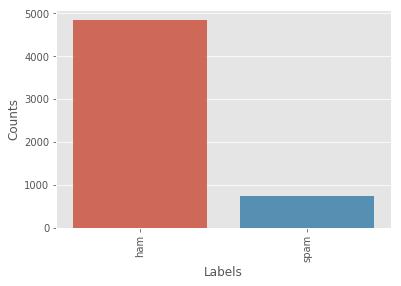

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

label_counts = df[0].value_counts()

sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

4. Generate a bar plot to display the class distribution. You may use “seaborn”s barplot function. [2 pts]

## PART C: Feature Extraction

5. Normalize the “text” by performing stemming and lemmatization. You should do experimentation with both stemming and lemmatization and see whether stemming/lemmatization or a combination of both improves the accuracy of classification. Finally use the best performing normalization. For text normalization you may use the NLTK library.

In [3]:
import nltk
nltk.download('punkt')

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


6. Generate word clouds for both the spam and ham emails. You may use the NLTK library. [2 pts]

In [3]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

In [42]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud


lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vdoan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

X_lemmatized = []

for document in X:
    word_list = nltk.word_tokenize(document)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    X_lemmatized.append(lemmatized_output)

In [43]:
df['text_lemmatized'] = df[1].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))

In [44]:
X_lemmatized = df['text_lemmatized']

6. Generate word clouds for both the spam and ham emails. You may use the NLTK library. [2 pts]

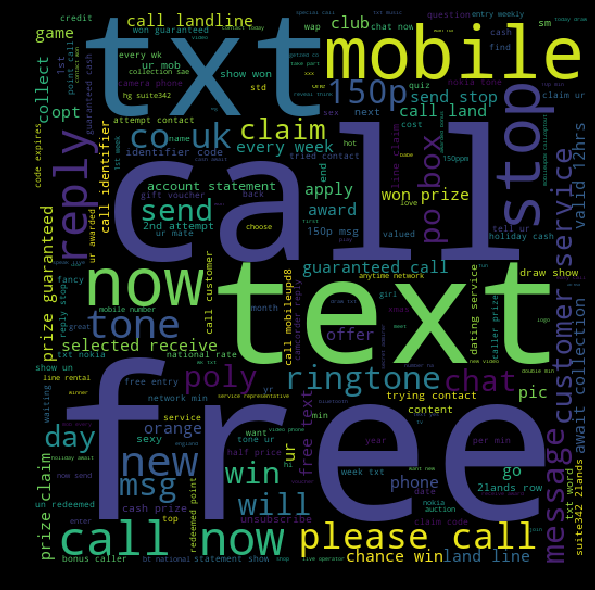

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

spam_words = ''.join(list(df[df[0]=='spam']['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

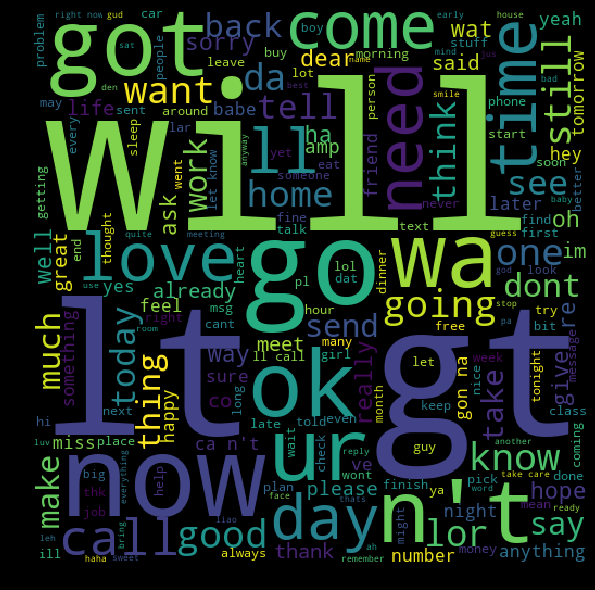

In [22]:
spam_words = ''.join(list(df[df[0]=='ham']['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

7. Remove the stop words from the text and convert the text content into numerical feature vectors. Note that for the multinomial Naïve Bayes classifier you need to count word occurrences as feature values. You may use Scikit-Learn’s CountVectorizer object for text preprocessing and feature vectorization. [3 pts]

In [45]:
df['text_lemmatized'][0]

'go until jurong point , crazy.. available only in bugis n great world la e buffet ... cine there got amore wat ...'

In [46]:
from nltk.tokenize import sent_tokenize, word_tokenize

word_tokenize(df['text_lemmatized'][0])

['go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [47]:
from nltk.corpus import stopwords 

set(stopwords.words('english'))
    
X_tokenize = []

for i in X_lemmatized:
    tokenized_string = word_tokenize(i)
    X_tokenize.append(' '.join(list([word for word in tokenized_string if word not in stopwords.words('english')])))

In [48]:
X_tokenize[0]

'go jurong point , crazy.. available bugis n great world la e buffet ... cine got amore wat ...'

In [49]:
df['processed data'] = X_tokenize

In [50]:
df.head()

,0,1,text_lemmatized,processed data
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point , crazy.. available only...","go jurong point , crazy.. available bugis n gr..."
1,ham,Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...,ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor ... u c already then sa...,u dun say early hor ... u c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do n't think he go to usf , he life arou...","nah n't think go usf , life around though"


In [51]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB


#count_vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 2))
#count_vect = CountVectorizer(lowercase=True, stop_words='english')
#count_vect = CountVectorizer(lowercase=True, stop_words='english', binary=True)
count_vect = CountVectorizer()


X_counts = count_vect.fit_transform(X_tokenize)
print(X_counts.shape)

print("Type of the occurance count matrix (should be sparse): ")
print(type(X_counts))

tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(X_tokenize)
print(X_tfidf.shape)



(5574, 8212)
Type of the occurance count matrix (should be sparse): 
<class 'scipy.sparse.csr.csr_matrix'>
(5574, 8212)


In [52]:
df['tokenized'] = X_counts
df['tokenized_tfidf'] = X_tfidf

In [53]:
print(tfidf_vector.get_feature_names())


['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [54]:
X_counts[1]

<1x8212 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [ ]:
X_tfidf.toarray()
for i in X_tfidf.toarray():
    for j in i:
        if (j-1) < 0.0001:
            print ("Has 1")
            

Has 1


In [106]:
df['tokenized'] = X_counts
df['tokenized_tfidf'] = X_tfidf

In [107]:
df.head()

,0,1,text_lemmatized,processed data,tokenized,tokenized_tfidf
4354,ham,Fun fact: although you would think armand woul...,fun fact : although you would think armand wou...,Fun fact : although would think armand would e...,"(0, 7975)\t1\n (0, 1071)\t1\n (0, 3489)\t1...","(0, 3448)\t0.1549430539586567\n (0, 4218)\t..."
2591,ham,Lol I have to take it. member how I said my au...,lol i have to take it . member how i said my a...,Lol I take . member I said aunt flow n't visit...,"(0, 7975)\t1\n (0, 1071)\t1\n (0, 3489)\t1...","(0, 3448)\t0.1549430539586567\n (0, 4218)\t..."
16,ham,Oh k...i'm watching here:),oh k ... i 'm watching here : ),Oh k ... 'm watching : ),"(0, 7975)\t1\n (0, 1071)\t1\n (0, 3489)\t1...","(0, 3448)\t0.1549430539586567\n (0, 4218)\t..."
2532,ham,What's happening with you. Have you gotten a j...,what 's happening with you . have you gotten a...,What 's happening . Have gotten job begun regi...,"(0, 7975)\t1\n (0, 1071)\t1\n (0, 3489)\t1...","(0, 3448)\t0.1549430539586567\n (0, 4218)\t..."
2554,ham,√ú give me some time to walk there.,√ú give me some time to walk there .,√ú give time walk .,"(0, 7975)\t1\n (0, 1071)\t1\n (0, 3489)\t1...","(0, 3448)\t0.1549430539586567\n (0, 4218)\t..."


8. Create data or feature matrix X and the target vector Y. The number of columns in X is equal to the number of features. [2 pts]

In [20]:
X = df['tokenized']
y = df[0]

In [21]:
X[:3]

0      (0, 1071)\t1\n  (0, 1297)\t1\n  (0, 1727)\t1...
1      (0, 1071)\t1\n  (0, 1297)\t1\n  (0, 1727)\t1...
2      (0, 1071)\t1\n  (0, 1297)\t1\n  (0, 1727)\t1...
Name: tokenized, dtype: object

9. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names. [2 pts]

In [26]:
df = df.sample(frac=1)

In [27]:
df.head()

,0,1,tokenized,tokenized_tfidf
4284,ham,Science tells that chocolate will melt under t...,"(0, 7824)\t1\n (0, 1065)\t1\n (0, 3436)\t1...","(0, 3397)\t0.15494646120541336\n (0, 4151)\..."
696,ham,Good. Good job. I like entrepreneurs,"(0, 7824)\t1\n (0, 1065)\t1\n (0, 3436)\t1...","(0, 3397)\t0.15494646120541336\n (0, 4151)\..."
3580,ham,Multiply the numbers independently and count d...,"(0, 7824)\t1\n (0, 1065)\t1\n (0, 3436)\t1...","(0, 3397)\t0.15494646120541336\n (0, 4151)\..."
338,ham,Just sleeping..and surfing,"(0, 7824)\t1\n (0, 1065)\t1\n (0, 3436)\t1...","(0, 3397)\t0.15494646120541336\n (0, 4151)\..."
4882,ham,When/where do I pick you up,"(0, 7824)\t1\n (0, 1065)\t1\n (0, 3436)\t1...","(0, 3397)\t0.15494646120541336\n (0, 4151)\..."


7. Remove the stop words from the text and convert the text content into numerical feature vectors. Note that for the multinomial Naïve Bayes classifier you need to count word occurrences as feature values. You may use Scikit-Learn’s CountVectorizer object for text preprocessing and feature vectorization. [3 pts]

In [ ]:
new_X.shape

In [63]:
new_X[0]

<1x8376 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [39]:
new_X

4284      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
696       (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3580      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
338       (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4882      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4934      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
5197      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3181      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
2778      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
1019      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
2740      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
5520      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4595      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
2201      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
2872      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
2217      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4926      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
462       (0, 

10. Partition the data into train and test set (80%-20%). Use the “Partition” function from your previous assignment.8. Create data or feature matrix X and the target vector Y. The number of columns in X is equal to the number of features. [2 pts]

In [31]:
def partition(X, y,t):
    X_test = X[:int(t*X.shape[0])]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*X.shape[0]):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

#X = (X - X.min())/ (X.max() - X.min())
# X = (X - X.mean())/X.std()
# X.insert(0,'bias',0) # not sure if we need this?

X_train, y_train, X_test, y_test = partition(new_X, y, 0.2)

In [57]:
X

4354      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
2591      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
16        (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
2532      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
2554      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
1029      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
2582      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
2863      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
2772      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
657       (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
4774      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
2230      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
4300      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
4886      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
3238      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
337       (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
1466      (0, 8185)\t0.2345377685302532\n  (0, 7975)\t...
1704      (0, 

In [67]:
X_train.shape

(4460, 8376)

In [38]:
X_train

3861      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3616      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
783       (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
532       (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4477      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
391       (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4220      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
1021      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3867      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4535      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4239      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3234      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
5390      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
4729      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
1458      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3589      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3563      (0, 3397)\t0.15494646120541336\n  (0, 4151)\...
3378      (0, 

In [37]:
X_train[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

9. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names. [2 pts]

In [85]:
np.array(y_train)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
shuffle = df.sample(frac=1)

10. Partition the data into train and test set (80%-20%). Use the “Partition” function from your previous assignment.

In [ ]:
def partition(X, y,t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

## PART D: Model Evaluation

11. Model selection via Hyper-parameter tuning: Use the kFold function from the previous experiment to evaluate the performance of your model for the following values of the hyperparameter alpha = [0.1, 0.5, 1.0, 1.5, 2.0]. Determine the best model (model selection) based on the overall performance (lowest average error).

    For the error_function of the kFold function argument use the “F1 Score” function from previous assignment.[5 pts]

In [ ]:
#pVector = predict vector
#aVector = actual vector
def accuracy_score(y_true, y_pred):
    true_positive = 0
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            true_positive = true_positive + 1
    
    accuracy = true_positive / len(y_true)
    genError = 1 - accuracy  
            
    return accuracy, genError

In [ ]:
#Binary case
def precision_score(y_true, y_pred):
    true_positive = 0
    false_positive = 0
    
    for i in range(len(y_true)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
            else:
                false_positive = false_positive + 1
    
    if((true_positive + false_positive == 0)):
        precision = 0
    else:
        precision = true_positive / (true_positive + false_positive)
    return precision

def recall_score(y_true, y_pred):
    true_positive = 0
    false_negative = 0 
    
    for i in range(len(y_pred)):
        if (y_pred[i] == 1):
            if (y_pred[i] == y_true[i]):
                true_positive = true_positive + 1
        elif(y_pred[i] == 0):
            if (y_pred[i] != y_true[i]):
                false_negative = false_negative + 1
    if((true_positive + false_negative == 0)):
        recall = 0
    else:
        recall = true_positive / (true_positive + false_negative)
    return recall

def f1_score(y_true, y_pred):    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    if ((precision + recall) == 0):
        f1 = 0
    else:
        f1 = 2 * ((precision*recall)/(precision+recall))
    return f1

In [ ]:
def cross_val_kfold(model, X, y, folds, learning_rate, regularizer, lambd, **kwargs):
    
    partition = partitionHelper(np.array(X),folds)
    labels_partition = partitionHelper(np.array(y),folds)
    a2 = []
    epochs = 1000
    tol = 0.01
    
    prediction = []
    all_train_mse = []
    all_train_rmse = []
    all_mse = []
    
    for l in range(len(partition)-1):
        test_set = partition[l]
        test_label = labels_partition[l]
        train_set_unflattened = partition.copy()
        train_label_unflattened = labels_partition.copy()
        del train_set_unflattened[l]
        del train_label_unflattened[l]

        train_set = np.array([y for x in train_set_unflattened for y in x])
        train_label = np.array([y for x in train_label_unflattened for y in x])

        model.fit(train_set, train_label,learning_rate, 1000, tol, regularizer, lambd, **kwargs)
        
        #for k in range(len(partition[l])-1):
        #    prediction[k] = model.predict(partition[l][k])
        prediction = model.predict(test_set)
    
        error = mse(prediction, train_label)
        all_mse.append(error)
            
    return {'average_error': all_mse, 'pred': prediction, 'labels': test_label}

def kFold(model, X, Y, cv, model_args, error_function, **kwargs):

    accuracyMatrix = []

    learning_rates = model_args[0]
    regularizers =  model_args[1]
    lambdas = model_args[2]
    total_cross_val = []
    total_arguments = []
    
    all_runs = []
    
    for i in learning_rates:
        #a = []
        #cross_val_a = []
        #argument_a = []
        for j in regularizers:
            for k in lambdas:
                a2 = cross_val_kfold(model, X, Y, cv, i, j, k, **kwargs)
                total_cross_val.append(a2)
                accuracyMatrix.append(mean(a2['average_error']))
                total_arguments.append([i,j,k])
                all_runs.append([i,j,k,mean(a2['average_error']),a2['average_error']])
    
    index_i = 0
    minAccuracy = accuracyMatrix[0]
    for i in range(len(accuracyMatrix)):
        if(minAccuracy > accuracyMatrix[i]):
            minAccuracy = accuracyMatrix[i]
            index_i = i

    print("Min Error Function:", minAccuracy)
    print("Best Model Parameters")
    print("Learning rates: ", total_arguments[index_i][0])
    print("Regularizers: ", total_arguments[index_i][1])
    print("Lambda: ", total_arguments[index_i][2])
    #print("Everything else: ", total_cross_val[index_i])

    return all_runs

12. [Extra Credit for 478 and Mandatory for 878]: Generate the Receiver Operating Characteristic (ROC) curve and compute the area under curve (AUC) score. You may reuse the functions from your previous assignment. [10 pts]

In [ ]:
def roc_curve(confusionMatrix):
    #Using sklearn: y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]
    threshold = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.3, 0.2, 0.1, 0]
    true_positive = confusionMatrix[1][1]
    positive = confusionMatrix[1][0] + confusionMatrix[1][1]
    false_negative = confusionMatrix[1][0]
    negative = confusionMatrix[0][0] + confusionMatrix[1][1]
    
    true_pos_rate = true_positive / postive 
    false_pos_rate = false_positive / negative 
    
    return true_pos_rate, false_pos_rate
    
def plot_roc_curve():
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
from numpy import trapz

def roc_auc(x, y):
    area = trapz(y, x, dx=0.1)
    
    return area

13. Evaluate your model on the test data and report the following performance measures. You may reuse the functions from your previous assignment.

        a. Precision
    
        b. Recall
    
        c. F1 score
    
        d. Confusion matrix
    
        e. Accuracy
         [5 pts]

14. [Extra Credit for both 478 & 878] Implement the Multivariate Bernoulli Naïve Bayes model. The hyperparameter should be the Additive or Laplace smoothing parameter alpha. Using cross-validation determine the best model.
    
    Evaluate your model on test data as specified in the previous question.[15 pts]

# Logistic Regression: Multi-Class Classification

## Part A: Model Code (478 & 878 45 pts)

Design a Softmax Regression classifier for performing multi-class classification on the
Iris dataset.

15. Implement the following function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. [5 pts]

        one_hot_labels(Y)
        
        Arguments:
        Y : ndarray
        1D array containing data with “int” type that represents class indices/labels.
        
        Returns:
        Y_one_hot : ndarray
        A matrix containing a one-hot vector for the Y of each instance. The number of rows is equal to the number of rows in Y. The number of columns is equal to the number of unique class indices/labels in Y (i.e., the number of classes).

In [116]:
def one_hot_labels(Y):
    if isinstance(Y, pd.Series):
        Y = Y.values
    count = len(set(Y))
    categories = list(set(Y))
    result = []
    mapping = {}
    
    for i in range(count):
        z = list(set(Y))
        mapping[z[i]] = i
    
    for i in range(len(Y)):
        z = Y[i]
        index = mapping[z]
        curr = [0] * count
        curr[index] = 1
        result.append(curr)
    return result

import numpy as np
# this function will calculate the probabilities of each target class over all possible target classes.
def softmax(score): 
    e_score = np.exp(score - np.max(score))
    return e_score / e_score.sum(axis=0)


def cross_entropy_loss(Y_one_hot, Y_proba):
    Y_proba = np.array(Y_proba)
    N = Y_proba.shape[0]
    ce = -np.sum(Y_one_hot*np.log(Y_proba))/N
    return ce


In [3]:
scores2D = np.array([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]])
print(softmax(scores2D))

[[0.09003057 0.00242826 0.01587624 0.33333333]
 [0.24472847 0.01794253 0.11731043 0.33333333]
 [0.66524096 0.97962921 0.86681333 0.33333333]]


16. Implement the following function that computes the softmax score or the normalized exponential of the score of a feature. [5 pts]

        softmax(score):

        Arguments:
        score : ndarray
        Score of a sample belonging to various classes.
        
        Returns:
        Y_proba : ndarray
        Probability of a sample belonging to various classes.

In [150]:
class Softmax_Regression:
    
    theta = 0
    
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, early_stopping=False, validation_fraction=0.1, **kwargs):
        prev_tol = 1
#         print(X)
        try:
            m = X.shape[1]
        except:
            m = len(np.array(X)[0])
        
        if type(X) is list:
            X = np.array(X)
        
        classes = len(list(set(Y)))
        # shape of theta_hat needs to be no. of features (including bias) x no. of classes
        theta_hat = np.zeros((m, classes)) # .reshape(-1,1)

        #theta_hat = theta_hat.T[0]

        if early_stopping:
            _, _, data_valid, labels_valid = partition(X, Y, validation_fraction)
            fault = 0
            best_validation = None

        for i in range(epochs):
            y_hat = np.matmul(X,theta_hat)
            scores = softmax(y_hat)
            onehot = one_hot_labels(Y)
            #error = mse(Y, y_hat)
            error = cross_entropy_loss(onehot, scores)
            
            print(scores)
            # on scores, pick class with highest probability
            maxcol = np.argmax(np.max(scores, axis=0))
            print(maxcol)
            maximum = scores[:,maxcol]
            
            # hot labels on scores[maxcol] ??
            maximum = one_hot_labels(maximum)
            
            # y needs to be hot labels?

            if regularizer == 'l1':
                theta_hat = np.subtract(np.subtract(theta_hat, (learning_rate/m) * np.dot(X.T, np.subtract(maximum, onehot))), learning_rate * lambd * theta_hat/np.sign(m))
            elif regularizer == 'l2':
                theta_hat = np.subtract(np.subtract(theta_hat, (learning_rate/m) * np.dot(X.T, np.subtract(maximum, onehot))), learning_rate * lambd * theta_hat/m)
            else:
                theta_hat = np.subtract(theta_hat, (learning_rate/m) * np.dot(X.T, np.subtract(maximum, onehot))) #scores, Y

#             print("theta_hat \n", theta_hat)
            y_hat_update = np.matmul(X,theta_hat)
#             print("y_hat_update \n", y_hat_update)
            #new_error = mse(Y, y_hat_update.T)
            scores = softmax(y_hat_update)
            new_error = cross_entropy_loss(onehot, scores)
            #print("new_error", new_error)

#             print("prev_tol", prev_tol)

            self.theta = theta_hat
            
            if tol is not None and new_error > error - tol:
                break
                
            if early_stopping:
                valid_onehot = one_hot_labels(labels_valid)
                valid_y_hat = np.matmul(data_valid,theta_hat)
                valid_scores = softmax(valid_y_hat)
                validation = cross_entropy_loss(valid_onehot, valid_scores) #y_hat_update.T
                if best_validation == None or validation > best_validation:
                    fault = 0
                    best_validation = validation
                elif fault >= 1: #arbitrary
                    break
                else:
                    fault += 1
        return
    
    def predict(self, X):
        # softmax on X?
        return np.matmul(X, self.theta)
    
    def __init__(self):
        return

In [151]:
softmax_regression = Softmax_Regression()
softmax_regression.fit(X_train, y_train, early_stopping=True, validation_fraction = 0.2)

[[0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00833333]
 [0.00833333 0.00833333 0.00

ValueError: operands could not be broadcast together with shapes (120,119) (120,3) 

17. Implement the following function to compute the cross-entropy loss. [5 pts]
    
        cross_entropy_loss(Y_one_hot, Y_proba)
    
        Arguments:
        Y_one_hot : ndarray
        A matrix containing a one-hot vector of class indices/labels for each instance.
        
        Y_proba : ndarray
        Probability of a sample belonging to various classes.
        
        Returns:
        cost : float

18. Implement a Softmax_Regression model class. It should have the following three methods. Note the that “fit” method should implement the batch gradient descent algorithm. Also, use 1st order derivative of the loss in the gradient descent [30 pts]

        a)
        fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0, early_stopping=False, validation_fraction=0.1, **kwargs)
        Arguments:
        
        X : ndarray
        A numpy array with rows representing data samples and columns representing features.
        
        Y : ndarray
        A 1D numpy array with labels corresponding to each row of the feature matrix X.
        
        learning_rate : float
        It provides the step size for parameter update.
           
        epochs : int
        The maximum number of passes over the training data for updating the weight vector.

        tol : float or None
        The stopping criterion. If it is not None, the iterations will stop when (error > previous_error - tol). If it is None, the number of iterations will be set by the “epochs”.
        
        regularizer : string
        The string value could be one of the following: l1, l2, None.
        If it’s set to None, the cost function without the regularization term will be used for computing the gradient and updating the weight vector.
        However, if it’s set to l1 or l2, the appropriate regularized cost function needs to be used for computing the gradient and updating the weight vector.
        Note: you may define two helper functions for computing the regularized cost for “l1” and “l2” regularizers.
        
        lambd : float
        It provides the regularization coefficient. It is used only when the “regularizer” is set to l1 or l2.
        
        early_stopping : Boolean, default=False
        Whether to use early stopping to terminate training when validation score is not improving. If set to True, it will automatically set aside a fraction of training data as validation and terminate training when validation score is not improving.
        
        validation_fraction : float, default=0.1
        The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.
        Note: the “fit” method should use a weight matrix “Theta_hat” that contains the parameters for the model (features and bias terms). The “Theta_hat” should be a matrix with dimension: no. of features (including bias) x no. of classes
        Finally, it should update the model parameter “Theta” to be used in “predict” method as follows.
        
        self.Theta = Theta_hat
        
        b)
        predict(self, X)
        
        Arguments:
        X : ndarray
        A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent features.
        Returns:
        1D array of predicted class labels for each row in X.
        Note: the “predict” method uses the self.Theta to make predictions.
        
        c)
        __init__(self)
        It’s a standard python initialization function so we can instantiate the class. Just “pass” this.

## Part B: Exploratory Data Analysis (478 & 878: 10 pts)

19. Read the Iris data using the sklearn.datasets.load_iris method.

In [75]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


20. Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. [3 pts]

21. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names.[2 pts]

22. Generate pair plots using the seaborn package (see first recitation notebook). This will be used to identify and report the redundant features, if there is any. [2 pts]

23. Scale the features. [1 pts]

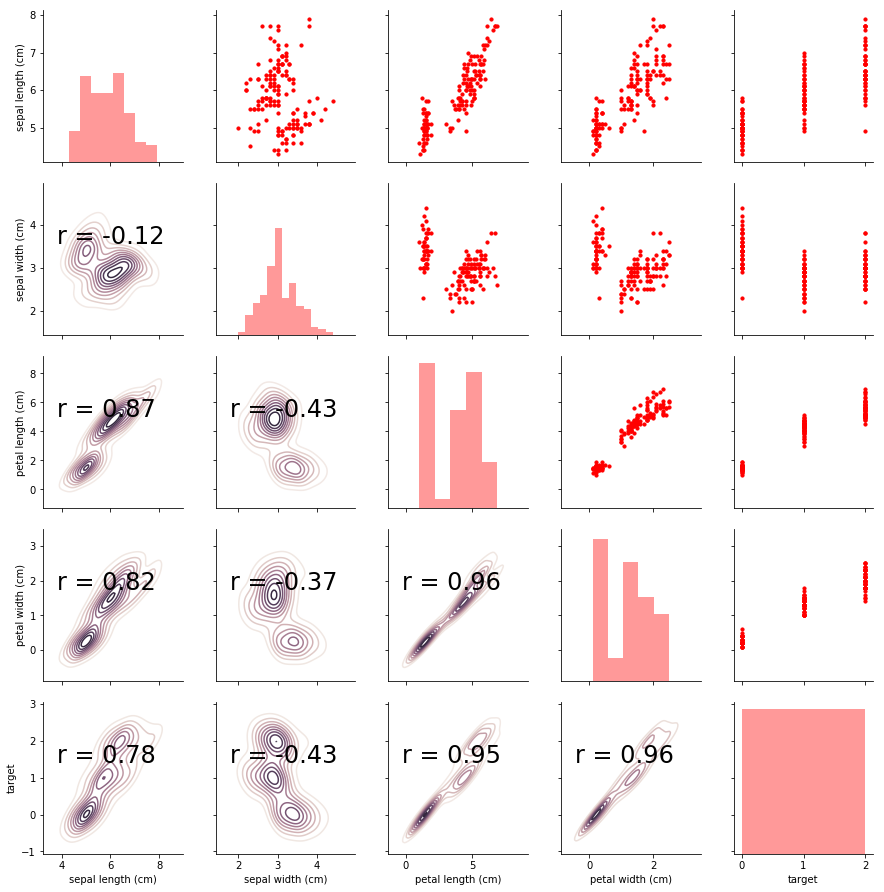

In [6]:
shuffle = df.sample(frac=1)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(shuffle)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

24. Partition the data into train and test set. Use the “Partition” function from your previous assignment. [2 pts]

In [76]:
def partition(X, y,t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

X = shuffle.drop(columns='target')
y = shuffle['target']
X_other = X
y_other = y

X = (X - X.min())/ (X.max() - X.min())
# X = (X - X.mean())/X.std()
X.insert(0,'bias',0) # not sure if we need this?

X_train, y_train, X_test, y_test = partition(X, y, 0.2)

## Part C: Model Evaluation (478: 15 pts & 878: 25 pts)
25. Model selection via Hyper-parameter tuning: Use the kFold function from previous assignment to evaluate the performance of your model over each combination of parameters from the following sets. You can increase the range of values for more experimentation if you want.[10 pts]

        a. lambd = [1.0, 0.1, 0.01, 0.001, 0.0001]
        b. tol = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
        c. learning_rate = [0.1, 0.01, 0.001]
        d. regularizer = [l1, l2]
        e. Store the returned dictionary for each and present it in the notebook.
        f. Determine the best model (model selection) based on the overall performance (lowest average error). For the error_function of the kFold function argument use accuracy.

26. Evaluate your model on the test data and report the accuracy and confusion matrix. [5 pts]

27. [Extra Credit for 478 and Mandatory for 878] Implement early stopping in the “fit” method of the Softmax_Regression model. You will have to use the following two parameters of the model: early_stopping and validation_fraction.

    Also note that when training the model using early stopping it should generate an early stopping curve. [10 pts]

28. [Extra Credit for both 478 & 878] Implement the Stochastic Gradient Descent Logistic Regression algorithm. Using cross-validation determine the best model.
    Evaluate your model on test data and report the accuracy and confusion matrix.[20 pts]